In [1]:
import pandas as pd
import numpy as np

In [2]:
suicide_info = pd.read_csv("master.csv")
suicide_info.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# rank suicide no after 2005
suicide_rank_country = suicide_info.loc[:,['country','year', 'suicides_no']].copy()
# suicide_rank_country = suicide_rank_country[suicide_rank_country.year > 2005]
suicide_rank_country = suicide_rank_country.groupby('country')[['suicides_no']].sum().reset_index().sort_values(['suicides_no'], ascending=False)
suicide_rank_country.head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

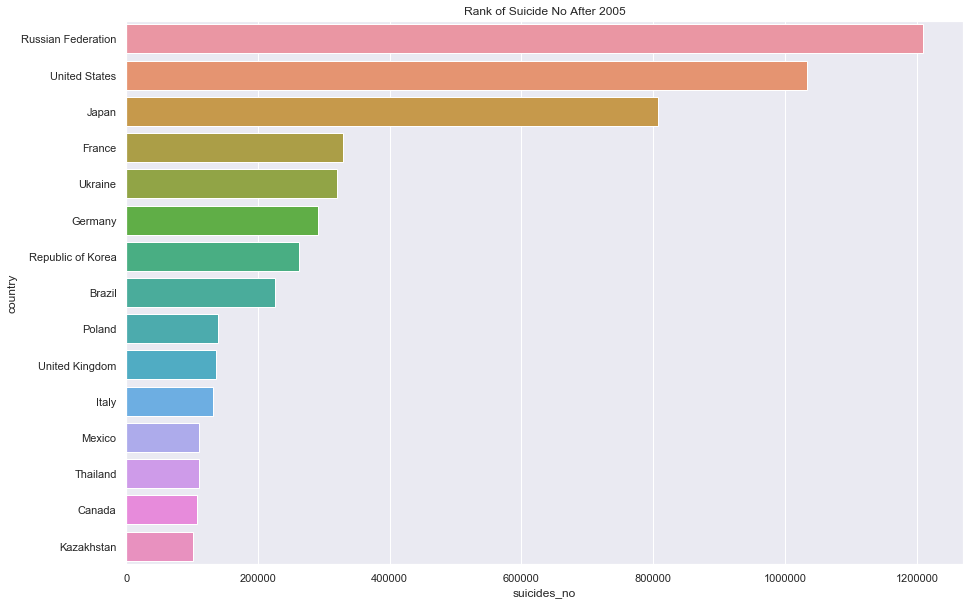

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="suicides_no", y="country", data=suicide_rank_country.head(15)).set_title("Rank of Suicide No After 2005")
plt.show()

In [6]:
# Suicide number group by gender 
suicide_gender_year = suicide_info.loc[:,['sex', 'suicides_no', 'year']].copy().groupby(['year', 'sex'])[['suicides_no']].sum().reset_index()
suicide_male_year = suicide_gender_year[suicide_gender_year.sex == "male"]
suicide_female_year = suicide_gender_year[suicide_gender_year.sex == "female"]

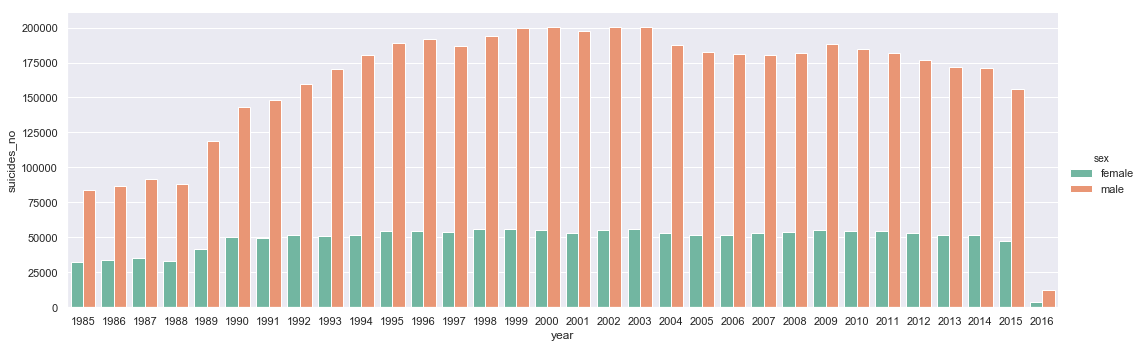

In [7]:
ax = sns.catplot(x = "year", y = "suicides_no", 
            hue = "sex", 
            data = suicide_gender_year, kind = "bar", palette="Set2",
            height=5, aspect=3)

In [ ]:
!pip install folium

In [8]:
import folium

In [9]:
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
coutry_geo = 'country.json'

In [10]:
suicide_rate_by_contry = pd.read_csv("suicide-rates-by-country.csv")
suicide_rate_by_contry_2005 = suicide_rate_by_contry.loc[suicide_rate_by_contry.Year == 2005].copy()
suicide_rate_by_contry_2005['rate'] = suicide_rate_by_contry_2005['suicide rate (age-adjusted suicides per 100,000 people)']
suicide_rate_by_contry_2005.head()

,Entity,Code,Year,"suicide rate (age-adjusted suicides per 100,000 people)",rate
2,Afghanistan,AFG,2005,6.684385,6.684385
5,Albania,ALB,2005,7.699330,7.699330
8,Algeria,DZA,2005,4.848770,4.848770
11,Andorra,AND,2005,5.362179,5.362179
14,Angola,AGO,2005,14.554677,14.554677


In [11]:
folium.Choropleth(
 geo_data=coutry_geo,
 name='Suicide No',
 data=suicide_rate_by_contry_2005,
 columns=['Entity', 'rate'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 legend_name='Suicide Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

In [12]:
m

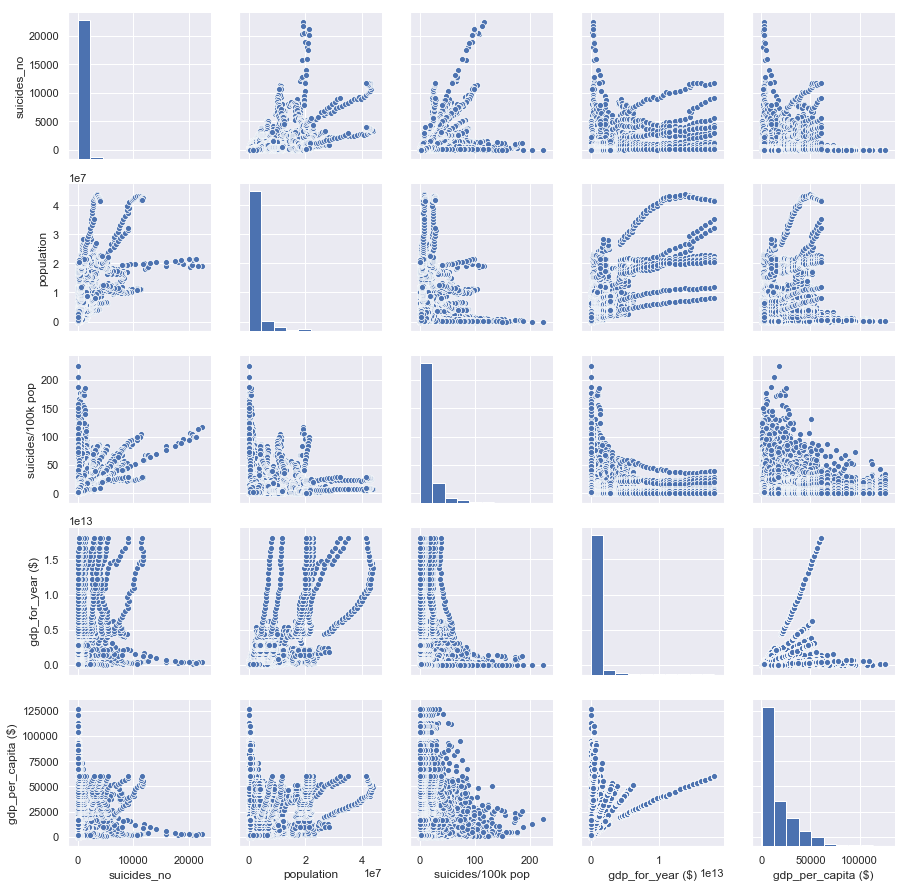

In [13]:
suicide_info[' gdp_for_year ($) '] = suicide_info[' gdp_for_year ($) '].str.replace(',', '')
suicide_info[' gdp_for_year ($) '] = suicide_info[' gdp_for_year ($) '].apply(pd.to_numeric)
sns.pairplot(suicide_info.drop(columns=['year', 'HDI for year']))
plt.show()

In [14]:
suicide_info.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [15]:
suicide_rate_after_2008 = suicide_info[suicide_info.year >= 2008]

In [16]:
suicide_rate_after_2008.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
228,Albania,2008,male,25-34 years,21,172855,12.15,Albania2008,NaN,12881352688,4672,Generation X
229,Albania,2008,male,35-54 years,37,377119,9.81,Albania2008,NaN,12881352688,4672,Boomers
230,Albania,2008,male,55-74 years,21,228672,9.18,Albania2008,NaN,12881352688,4672,Silent
231,Albania,2008,female,75+ years,5,59369,8.42,Albania2008,NaN,12881352688,4672,Silent
232,Albania,2008,female,15-24 years,20,276073,7.24,Albania2008,NaN,12881352688,4672,Millenials


In [17]:
# North America
suicide_with_ec = suicide_rate_after_2008.loc[:,['country', 'year', 'suicides/100k pop']].copy()
suicide_with_ec = suicide_with_ec[(suicide_with_ec.country == "Canada") | (suicide_with_ec.country == "United States")].groupby('year')[['suicides/100k pop']].sum().reset_index()
economic_risk_year = 2008

In [18]:
suicide_with_ec

,year,suicides/100k pop
0,2008,280.83
1,2009,284.86
2,2010,291.56
3,2011,287.38
4,2012,293.02
5,2013,299.76
6,2014,171.33
7,2015,175.41


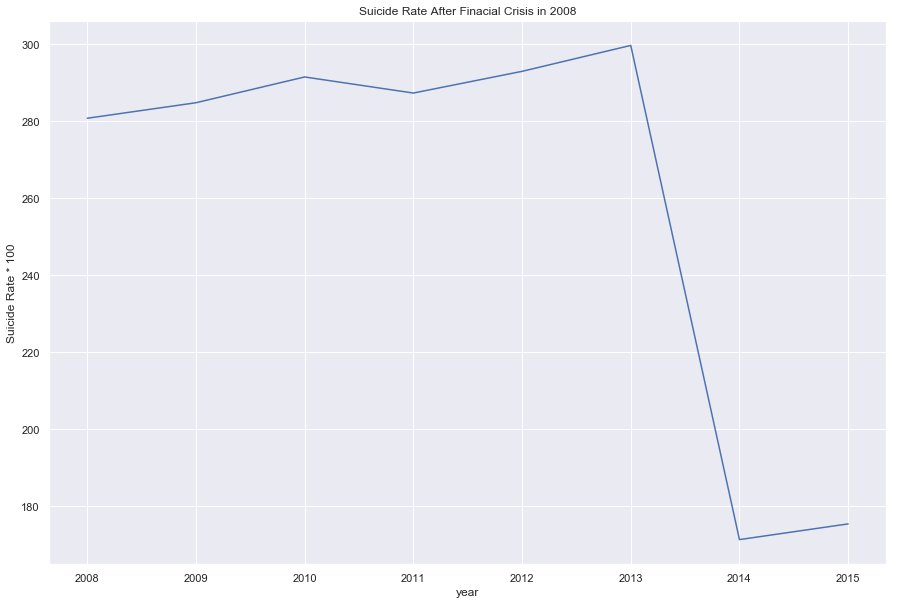

In [19]:
ax = sns.lineplot(x='year', y = 'suicides/100k pop', data = suicide_with_ec)
ax.set(ylabel = "Suicide Rate * 100")
plt.title("Suicide Rate After Finacial Crisis in 2008")
plt.show()

In [20]:
suicide_info.drop(columns=['HDI for year'], inplace=True)

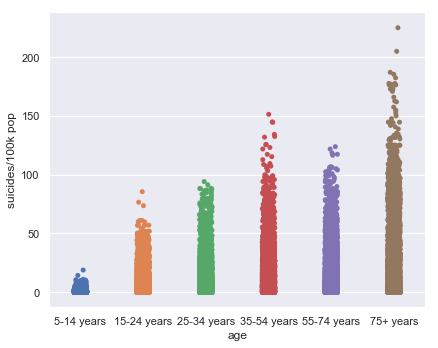

In [22]:
suicide_info.age = suicide_info.age.astype('category')
x_labels = ['5-14 years', '15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
suicide_info.age.cat.set_categories(x_labels, inplace = True)
suicide_info.sort_values(['age'])
ax = sns.catplot(x="age", y="suicides/100k pop", data=suicide_info, height = 5, aspect=1.25)
plt.show()

In [23]:
suicide_info.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [24]:
population_growth = suicide_info.loc[:, ['country', 'year', 'population', 'suicides/100k pop']].copy()
population_growth = population_growth.groupby(['country','year'])[['population', 'suicides/100k pop']].sum().reset_index()

In [25]:
population_growth.head()

,country,year,population,suicides/100k pop
0,Albania,1987,2709600,31.85
1,Albania,1988,2764300,32.46
2,Albania,1989,2803100,33.40
3,Albania,1992,2822500,18.00
4,Albania,1993,2807300,32.56


In [26]:
population_growth['population_growth'] = population_growth['population'].diff().fillna(0)

In [27]:
population_growth['population_growth'] = population_growth['population_growth'] / population_growth['population'] * 100
population_growth.head()

,country,year,population,suicides/100k pop,population_growth
0,Albania,1987,2709600,31.85,0.000000
1,Albania,1988,2764300,32.46,1.978801
2,Albania,1989,2803100,33.40,1.384182
3,Albania,1992,2822500,18.00,0.687334
4,Albania,1993,2807300,32.56,-0.541446


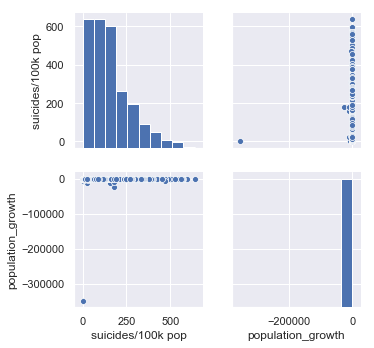

In [28]:
sns.pairplot(population_growth.loc[:, ['suicides/100k pop', 'population_growth']])
plt.show()

In [34]:
unemployment_rate = pd.read_csv("UNdata_Export_20190107_231138133.csv")
unemployment_rate.head()

,OID,Country or Area,Year,Description,Magnitude,Value,Rate
0,91467R..ZF...,ALBANIA,2008,UNEMPLOYMENT RATE,PERCENT PER ANNU,1275%,12.75%
1,91467R..ZF...,ALBANIA,2007,UNEMPLOYMENT RATE,PERCENT PER ANNU,1336%,13.36%
2,91467R..ZF...,ALBANIA,2006,UNEMPLOYMENT RATE,PERCENT PER ANNU,1390%,13.90%
3,91467R..ZF...,ALBANIA,2005,UNEMPLOYMENT RATE,PERCENT PER ANNU,1430%,14.30%
4,91467R..ZF...,ALBANIA,2004,UNEMPLOYMENT RATE,PERCENT PER ANNU,1475%,14.75%


In [35]:
unemployment_rate['Rate'] = unemployment_rate['Rate'].str.rstrip('%').astype('float')
world_up_rate = unemployment_rate.groupby(['Year'])[['Rate']].mean().reset_index()

In [36]:
world_up_rate.head()

,Year,Rate
0,1948,3.77
1,1949,5.91
2,1950,5.33
3,1951,3.33
4,1952,3.03


In [47]:
suicide_rate = suicide_info.loc[:, ['year', 'suicides/100k pop']].copy()

In [48]:
suicide_rate = suicide_rate.groupby(['year'])[['suicides/100k pop']].sum().reset_index()

In [49]:
suicide_rate['rate'] = suicide_rate['suicides/100k pop']
suicide_rate.drop(columns=['suicides/100k pop'], inplace=True)
suicide_rate['rate'] = suicide_rate['rate'] / 1000
suicide_rate.head()

,year,rate
0,1985,6.81189
1,1986,6.57984
2,1987,7.54545
3,1988,7.47313
4,1989,8.03654


In [55]:
unem_suicide_rate = suicide_rate.set_index('year').join(world_up_rate.set_index('Year')).reset_index()
unem_suicide_rate.head()

,year,rate,Rate
0,1985,6.81189,9.847027
1,1986,6.57984,8.806042
2,1987,7.54545,8.734255
3,1988,7.47313,8.672800
4,1989,8.03654,8.390339


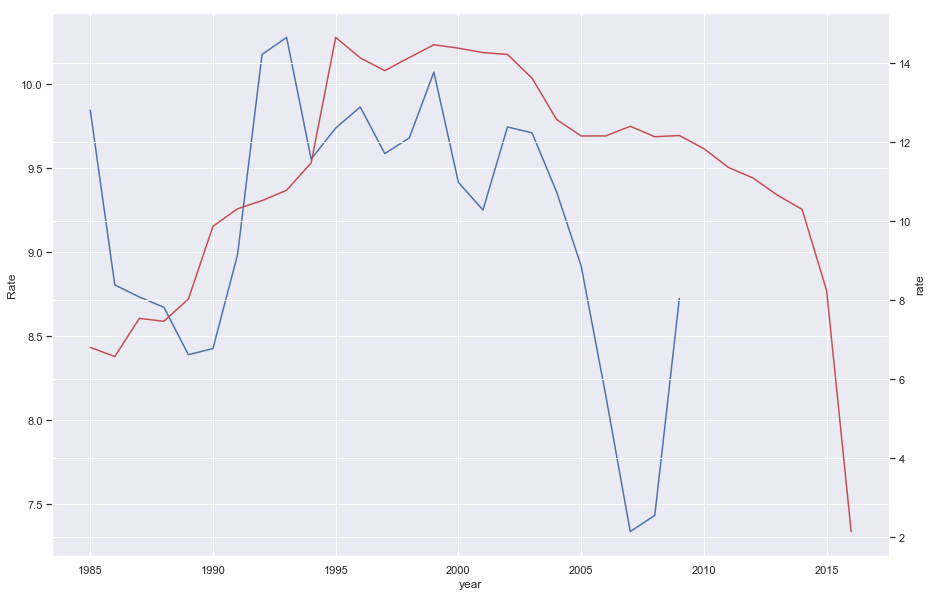

In [56]:
fig, ax = plt.subplots()
sns.lineplot(x = 'year', y='Rate', data = unem_suicide_rate, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x = 'year', y='rate', data = unem_suicide_rate, ax = ax2, color='r')
plt.show()